# EDA ASSIGNMENT

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, WE will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.



# LIBRARIES

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

READ THE FILE

In [5]:
N_APP = pd.read_csv(r'C:\Users\aks2c\OneDrive\Desktop\Data science\DATA\application_data.csv')
P_APP = pd.read_csv(r'C:\Users\aks2c\OneDrive\Desktop\Data science\DATA\previous_application.csv')

In [6]:
N_APP.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [7]:
P_APP.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

# NEW APPLICATION ANALYSIS

In [9]:
N_APP.shape

(307511, 122)

In [10]:
N_APP.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [11]:
N_APP.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [13]:
 #Finding the percentage of missing values in all columns
round(N_APP.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [14]:
# Removing all the columns with more than 50% nulls values/Keeping all of them with <= 50% null values
N_APP = N_APP.loc[:,N_APP.isnull().mean()<=0.5]
N_APP.shape

(307511, 81)

In [15]:
#Selecting columns with less or equal to than 13% null vallues
list(N_APP.columns[(N_APP.isnull().mean()<=0.13) & (N_APP.isnull().mean()>0)])

#We will check those columns for possible imputation

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

Checking for values to impute in columns

In [16]:
N_APP['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

C:\Users\aks2c\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


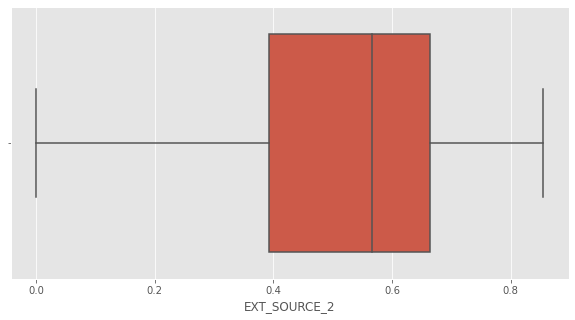

In [17]:
# EXT_SOURCE_2 is a continuous variable. So checking for outliers
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(N_APP['EXT_SOURCE_2'])
plt.show()

In [18]:
# Since EXT_SOURCE_2 has no outlier, we can choose mean to impute the column
imputVAL = round(N_APP['EXT_SOURCE_2'].mean(),2)
print(f'Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the coumn i.e. {imputVAL}')

Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the coumn i.e. 0.51


OCCUPATION_TYPE imputation

In [19]:
N_APP['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

C:\Users\aks2c\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


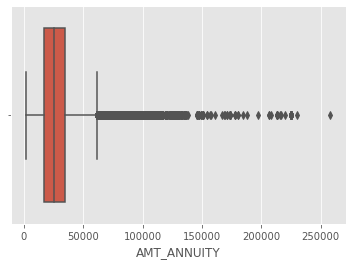

In [20]:
# Since AMT_ANNUITY is a continuous variable. So checking for outliers
sns.boxplot(N_APP['AMT_ANNUITY'])
plt.show()

In [21]:
imputVAL = round(N_APP['AMT_ANNUITY'].median(),2)
print(f'Since AMT_ANNUITY has outliers, the column can be imputed using the median of the coumn i.e. {imputVAL}')

Since AMT_ANNUITY has outliers, the column can be imputed using the median of the coumn i.e. 24903.0


NAME_TYPE_SUITE imputation

In [24]:
N_APP['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [25]:
imputVAL = N_APP['NAME_TYPE_SUITE'].mode()
print(f'Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e {imputVAL[0]}')

Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e Unaccompanied


CNT_FAM_MEMBERS imputation

C:\Users\aks2c\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


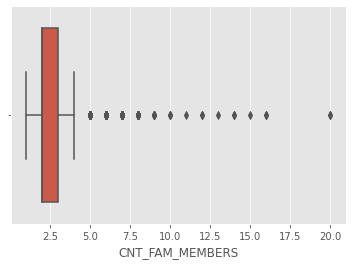

In [26]:
# Since this is count of family members, this is a continuous variable and we can impute the mean/median
sns.boxplot(N_APP['CNT_FAM_MEMBERS'])
plt.show()

In [27]:
imputVAL = round(N_APP['CNT_FAM_MEMBERS'].median(),2)
print(f'Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. {imputVAL}')

Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. 2.0


AMT_GOODS_PRICE imputation

In [28]:
N_APP['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

C:\Users\aks2c\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


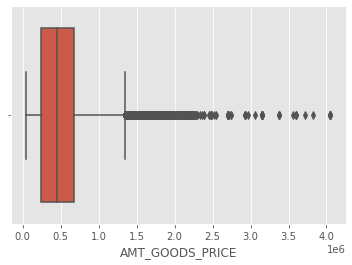

In [29]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers
sns.boxplot(N_APP['AMT_GOODS_PRICE'])
plt.show()

In [30]:
# Since this is a continuous variable with outliers we can impute column using median value
imputVAL = round(N_APP['AMT_GOODS_PRICE'].median(),2)
print(f'Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn i.e. {imputVAL}')

Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn i.e. 450000.0


Check datatypes of columns and modify them appropriately

In [31]:
#Checking the float type columns
N_APP.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [32]:
#Converting these count columns to int64
ColumnToConvert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
N_APP.loc[:,ColumnToConvert]=N_APP.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))

C:\Users\aks2c\anaconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [33]:
#Checking the object type columns
ColumnToConvert = list(N_APP.select_dtypes(include='object').columns)

In [34]:
N_APP.loc[:,ColumnToConvert]=N_APP.loc[:,ColumnToConvert].apply(lambda col: col.astype('str',errors='ignore'))


In [35]:
N_APP.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 81 columns]

In [36]:
#Making Gender more readable
N_APP['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [37]:
# Dropping the Gender = XNA from the data set as there is not enough data regarding that 
N_APP = N_APP[N_APP['CODE_GENDER']!='XNA']
N_APP['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

Binning variables for analysis

In [38]:
N_APP['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [39]:
#Creating A new categorical variable based on income total
N_APP['INCOME_GROUP']=pd.qcut(N_APP['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [41]:
#Binning DAYS_BIRTH
abs(N_APP['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.6
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [42]:
#Creating a column AGE using DAYS_BIRTH
N_APP['AGE']=abs(N_APP['DAYS_BIRTH'])//365.25

In [43]:
N_APP['AGE'].describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [44]:
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
N_APP['AGE_GROUP'] = pd.cut(N_APP['AGE'],bins=np.arange(20,71,5))

In [45]:
## Adding one more column that will be used for analysis later
N_APP['CREDIT_INCOME_RATIO']=round((N_APP['AMT_CREDIT']/N_APP['AMT_INCOME_TOTAL']))

In [48]:
### Getting the percentage of social circle who defaulted
N_APP['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']=N_APP['DEF_30_CNT_SOCIAL_CIRCLE']/N_APP['OBS_30_CNT_SOCIAL_CIRCLE']
N_APP['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']=N_APP['DEF_60_CNT_SOCIAL_CIRCLE']/N_APP['OBS_60_CNT_SOCIAL_CIRCLE']

Checking for imbalance in Target


In [49]:
N_APP['TARGET'].value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

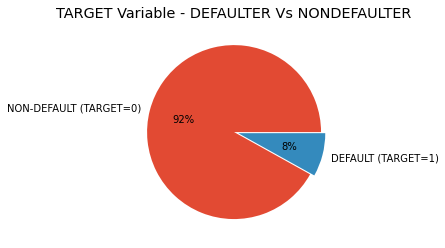

In [50]:
plt.pie(N_APP['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

Its clear that there is an imbalance between people who defaulted and who didn't default. More than 92% of people didn't default as opposed to 8% who defaulted.

In [51]:
# From the remaining columns about 30 are selected based on their description and relevance with problem statement 
#for further analysis
FinalColumns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
'SOCIAL_CIRCLE_60_DAYS_DEF_PERC','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [53]:
N_APP_1=N_APP[FinalColumns]

In [55]:
N_APP_1.shape

(307507, 30)

# Splitting the dataframe into two separate data frames


In [56]:
NEWAPP0=N_APP_1[N_APP_1.TARGET==0]    # Dataframe with all the data related to non-defaulters
NEWAPP1=N_APP_1[N_APP_1.TARGET==1]    # Dataframe with all the data related to defaulters

Univariate Analysis

In [57]:
# function to count plot for categorical variables
def plotuninewapp(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=NEWAPP0,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(NEWAPP0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=NEWAPP1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(NEWAPP1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

 Univariate Categorical Ordered Analysis

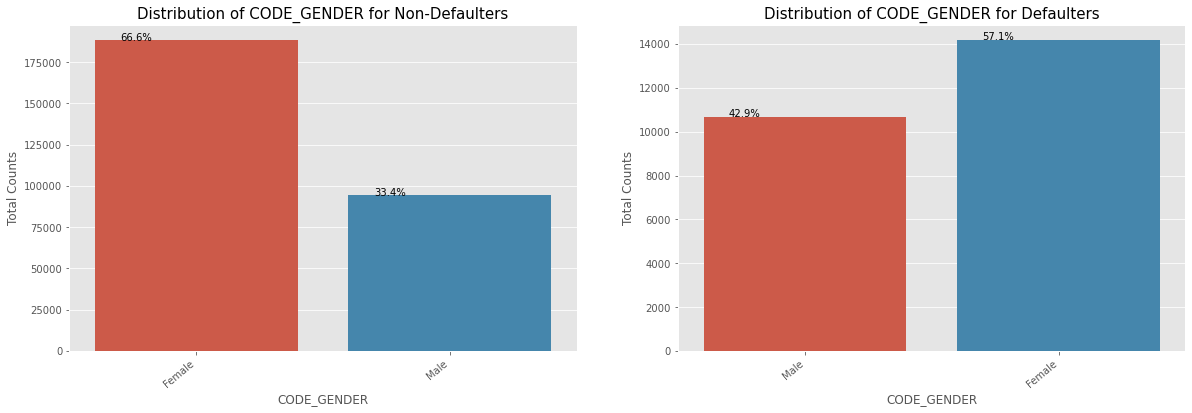

In [58]:
plotuninewapp('CODE_GENDER')

We can see that Female contribute 67% to the non-defaulters while 57% to the defaulters. We can conclude that
We see more female applying for loans than males and hence the more number of female defaulters as well.
But the rate of defaulting of FEMALE is much lower compared to their MALE counterparts.

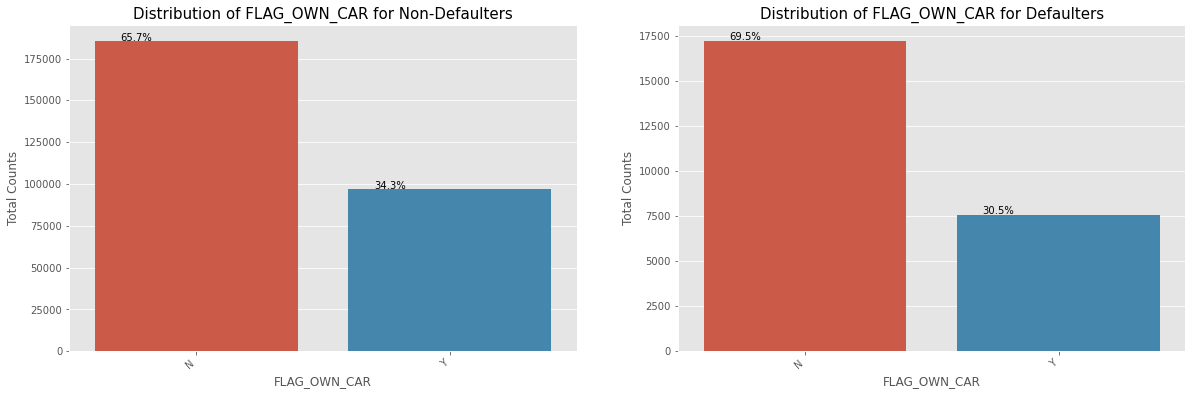

In [59]:
plotuninewapp('FLAG_OWN_CAR')

We can see that people with cars contribute 65.7% to the non-defaulters while 69.5% to the defaulters. We can conclude that
While people who have car default more often, the reason could be there are simply more people without cars
Looking at the percentages in both the charts, we can conclude that the rate of default of people having car is low compared to people who don't.

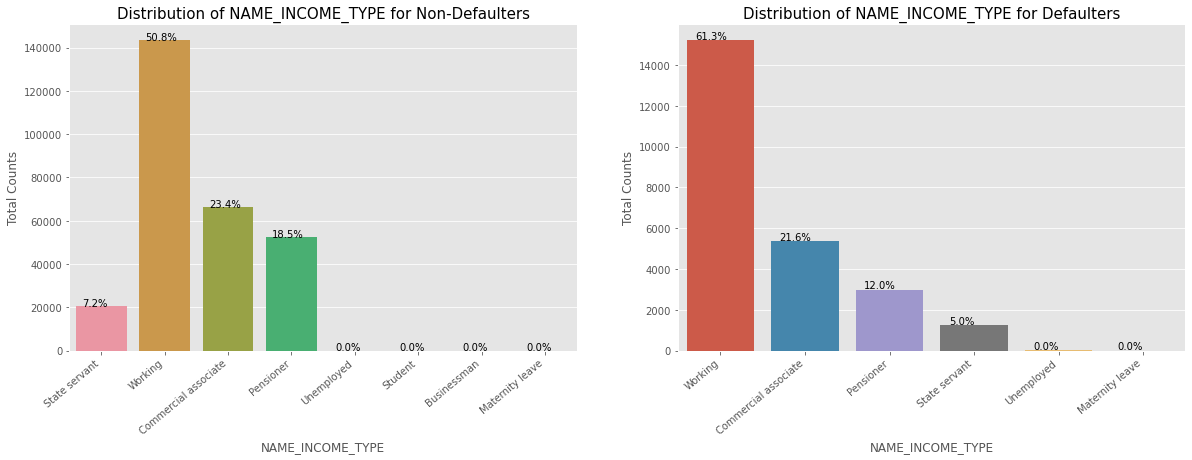

In [60]:
plotuninewapp('NAME_INCOME_TYPE')

We can notice that the students don't default. The reason could be they are not required to pay during the time they are students.
We can also see that the BusinessMen never default.
Most of the loans are distributed to working class people
We also see that working class people contribute 51% to non defaulters while they contribute to 61% of the defaulters. Clearly, the chances of defaulting are more in their case.

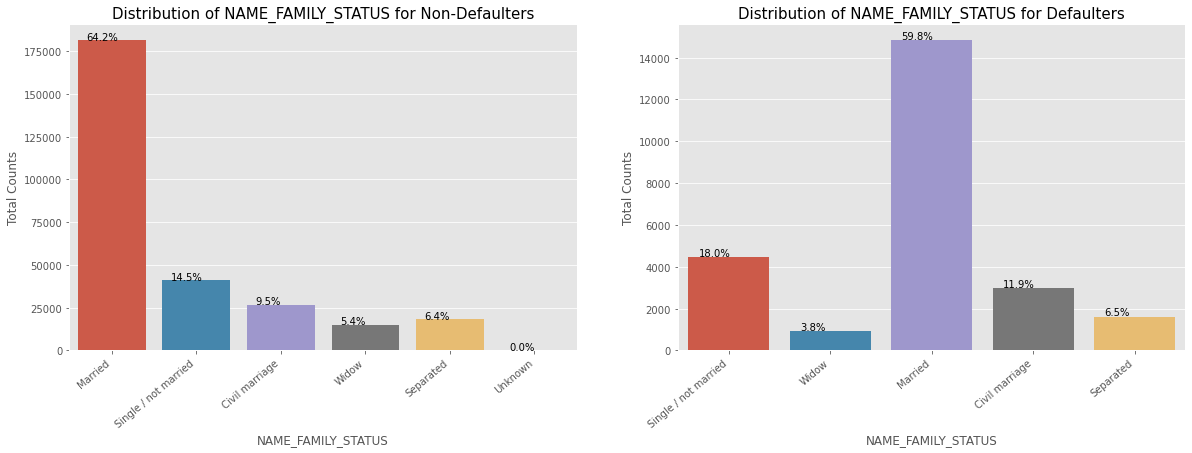

In [61]:
plotuninewapp('NAME_FAMILY_STATUS')

Married people tend to apply for more loans comparatively.
But from the graph we see that Single/non Married people contribute 14.5% to Non Defaulters and 18% to the defaulters. So there is more risk associated with them.

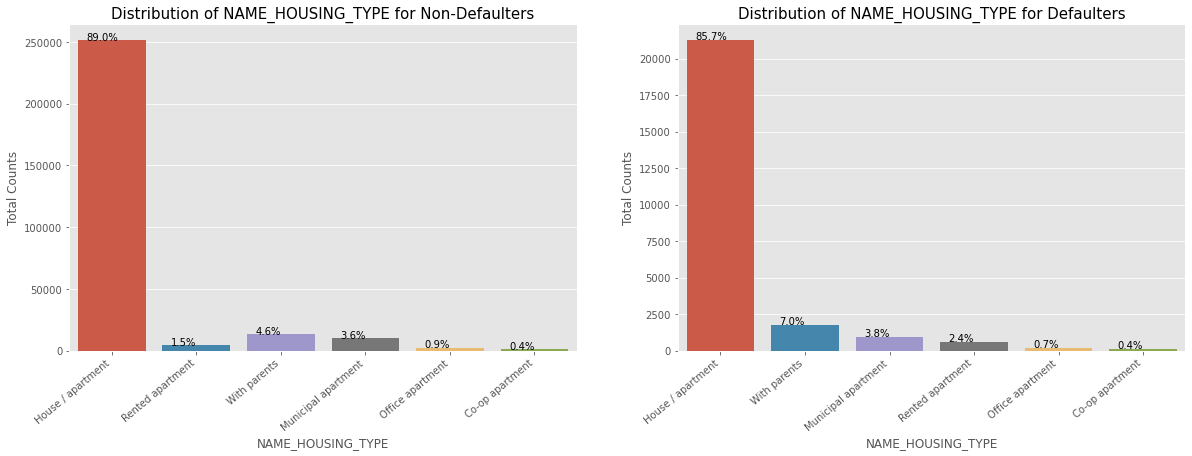

In [63]:
plotuninewapp('NAME_HOUSING_TYPE')

It is clear from the graph that people who have House/Appartment, tend to apply for more loans.
People living with parents tend to default more often when compared with others.The reason could be their living expenses are more due to their parents living with them.



Univariate Categorical Ordered Analysis

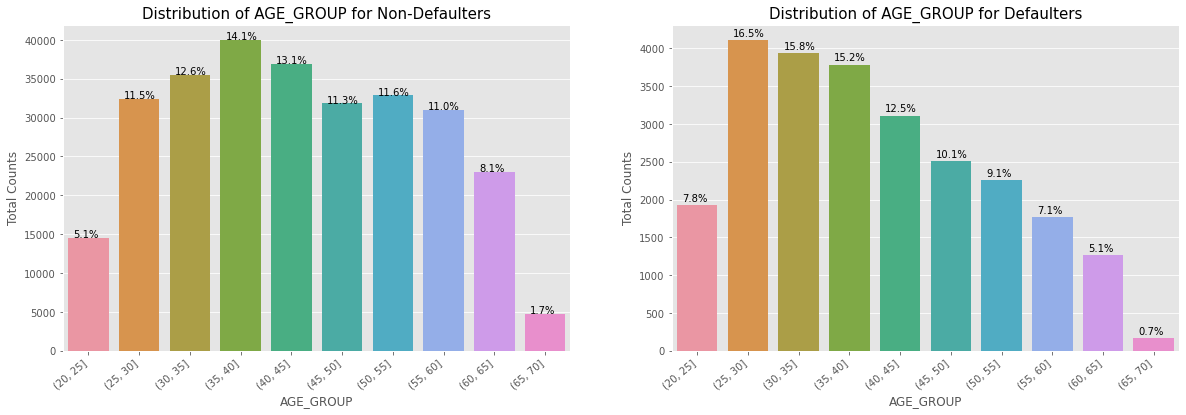

In [64]:
plotuninewapp('AGE_GROUP')

We see that (25,30] age group tend to default more often. So they are the riskiest people to loan to.
With increasing age group, people tend to default less starting from the age 25. One of the reasons could be they get employed around that age and with increasing age, their salary also increases.

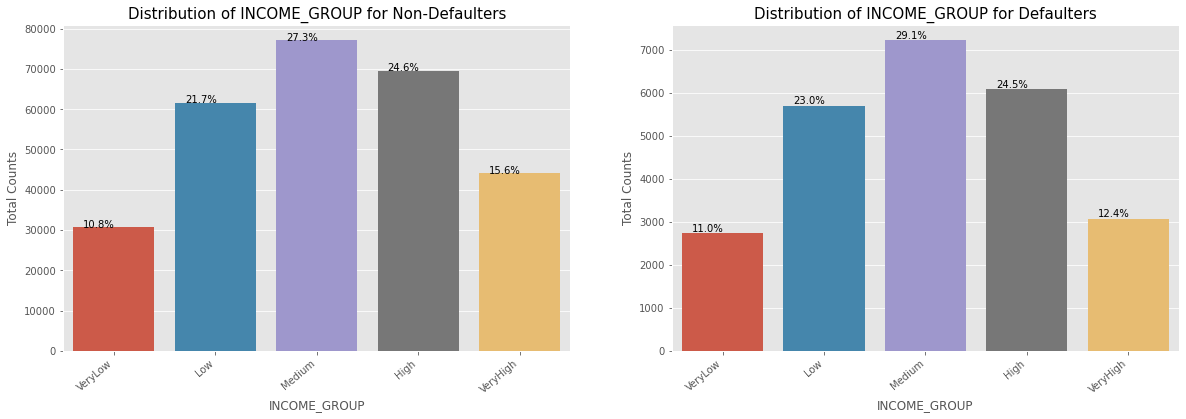

In [65]:
plotuninewapp('INCOME_GROUP')

The Very High income group tend to default less often. They contribute 12.4% to the total number of defaulters, while they contribute 15.6% to the Non-Defaulters.

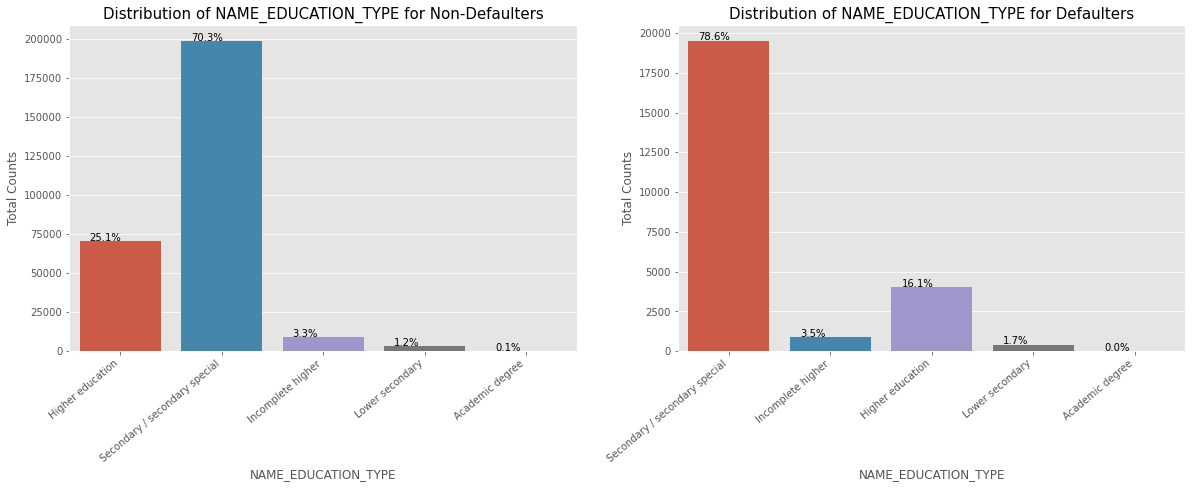

In [66]:
plotuninewapp('NAME_EDUCATION_TYPE')

Almost all of the Education categories are equally likely to default except for the higher educated ones who are less likely to default and secondary educated people are more likely to default

In [68]:
plotuninewapp('REGION_RATING_CLIENT')

More people from second tier regions tend to apply for loans.
We can infer that people living in better areas(Rating 3) tend contribute more to the defaulters by their weightage.
People living in 1 rated areas

Univariate continuous variable analysis

In [69]:
# function to dist plot for continuous variables
def plotunidist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=NEWAPP0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=NEWAPP1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

C:\Users\aks2c\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aks2c\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


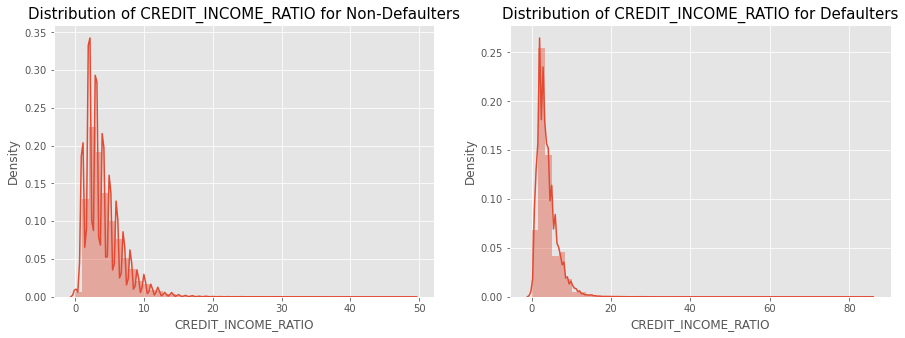

In [70]:
plotunidist('CREDIT_INCOME_RATIO')

Credit income ratio the ratio of AMT_CREDIT/AMT_INCOME_TOTAL.
Although there doesn't seem to be a clear distiguish between the group which defaulted vs the group which didn't when compared using the ratio, we can see that when the CREDIT_INCOME_RATIO is more than 50, people default.

C:\Users\aks2c\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aks2c\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


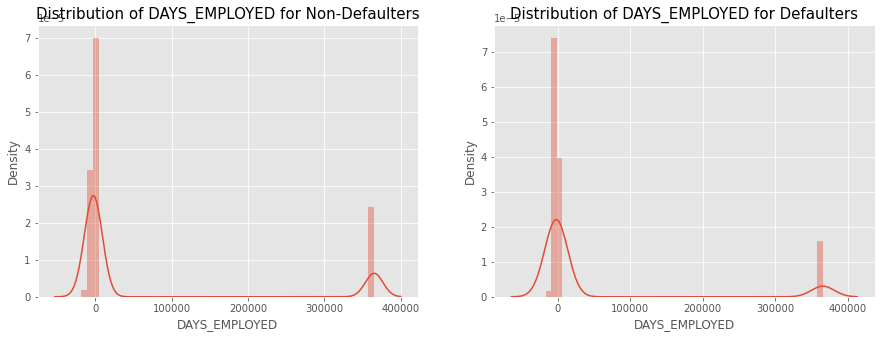

In [71]:
plotunidist('DAYS_EMPLOYED')

In [72]:
NEWAPP1['CNT_FAM_MEMBERS'].value_counts()

2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
10.0        1
13.0        1
11.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

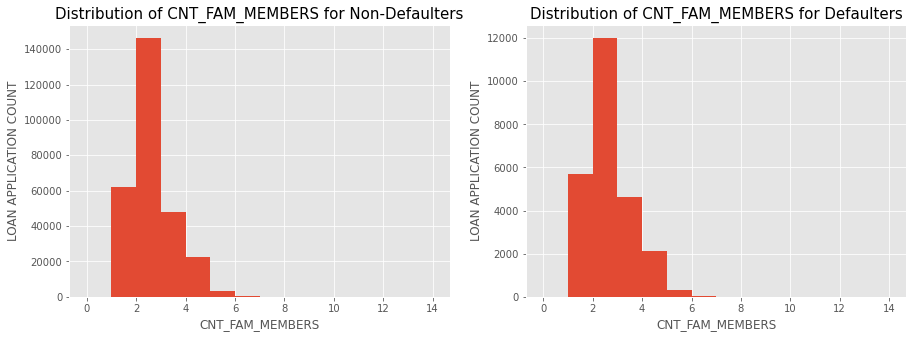

In [73]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
NEWAPP0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
NEWAPP1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

We can see that a family of 3 applies loan more often than the other families

Getting the top 10 correlation of the selected columns

In [74]:
#Getting the top 10 correlation in NEWAPP0
corr=NEWAPP0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)


C:\Users\aks2c\AppData\Local\Temp/ipykernel_12380/1046629440.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()


Column1                         Column2  \
308                 AMT_GOODS_PRICE                      AMT_CREDIT   
297            REGION_RATING_CLIENT     REGION_RATING_CLIENT_W_CITY   
208  SOCIAL_CIRCLE_60_DAYS_DEF_PERC  SOCIAL_CIRCLE_30_DAYS_DEF_PERC   
321                 AMT_GOODS_PRICE                     AMT_ANNUITY   
272                     AMT_ANNUITY                      AMT_CREDIT   
74              CREDIT_INCOME_RATIO                      AMT_CREDIT   
310                 AMT_GOODS_PRICE             CREDIT_INCOME_RATIO   
273                     AMT_ANNUITY                AMT_INCOME_TOTAL   
274                     AMT_ANNUITY             CREDIT_INCOME_RATIO   
309                 AMT_GOODS_PRICE                AMT_INCOME_TOTAL   

     Correlation  Abs_Correlation  
308     0.987253         0.987253  
297     0.950148         0.950148  
208     0.873003         0.873003  
321     0.776686         0.776686  
272     0.771308         0.771308  
74      0.648589         0.648589  
310     0.628749         0.628749  
273     0.418954         0.418954  
274     0.391499         0.391499  
309     0.349461         0.349461

In [75]:
#Getting the top 10 correlation NEWAPP1
corr=NEWAPP1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

C:\Users\aks2c\AppData\Local\Temp/ipykernel_12380/362095157.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()


Column1                         Column2  \
308                 AMT_GOODS_PRICE                      AMT_CREDIT   
297            REGION_RATING_CLIENT     REGION_RATING_CLIENT_W_CITY   
208  SOCIAL_CIRCLE_60_DAYS_DEF_PERC  SOCIAL_CIRCLE_30_DAYS_DEF_PERC   
321                 AMT_GOODS_PRICE                     AMT_ANNUITY   
272                     AMT_ANNUITY                      AMT_CREDIT   
74              CREDIT_INCOME_RATIO                      AMT_CREDIT   
310                 AMT_GOODS_PRICE             CREDIT_INCOME_RATIO   
274                     AMT_ANNUITY             CREDIT_INCOME_RATIO   
113               DAYS_REGISTRATION                   DAYS_EMPLOYED   
149                 CNT_FAM_MEMBERS                   DAYS_EMPLOYED   

     Correlation  Abs_Correlation  
308     0.983103         0.983103  
297     0.956637         0.956637  
208     0.874562         0.874562  
321     0.752699         0.752699  
272     0.752195         0.752195  
74      0.639744         0.639744  
310     0.623163         0.623163  
274     0.381298         0.381298  
113    -0.188929         0.188929  
149    -0.186561         0.186561

Bivariate Analysis of numerical variables

In [76]:
# function for scatter plot for continuous variables
def plotbivar(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=NEWAPP0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=NEWAPP1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

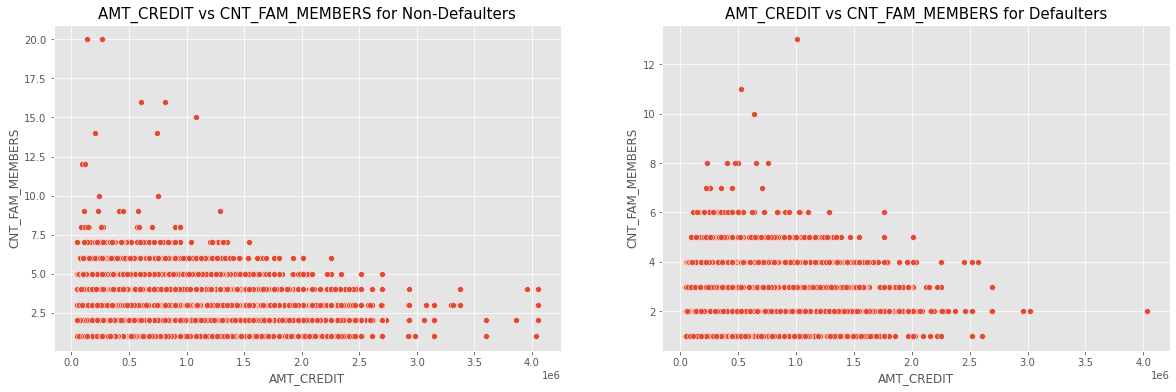

In [77]:
plotbivar('AMT_CREDIT','CNT_FAM_MEMBERS')

We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often

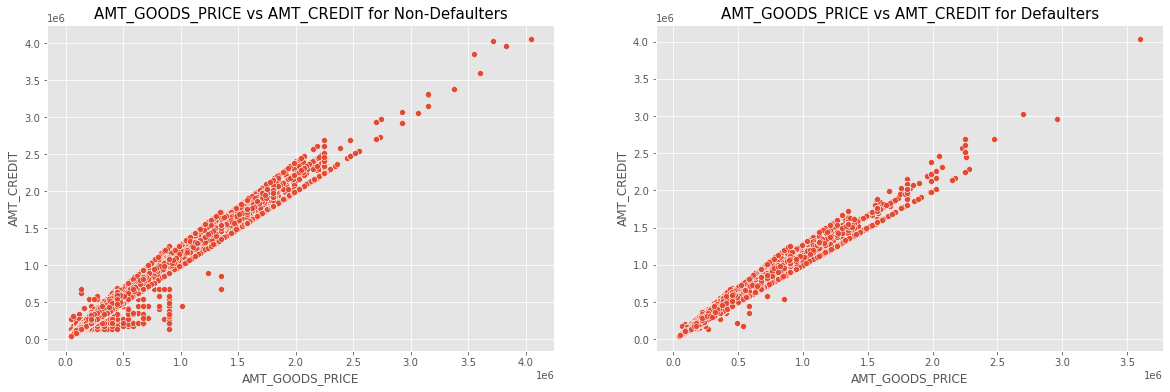

In [78]:
plotbivar('AMT_GOODS_PRICE','AMT_CREDIT')

# Data Analysis For Previous Application Data

In [79]:
P_APP.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [80]:
P_APP.shape

(1670214, 37)

In [81]:
P_APP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [82]:
P_APP.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [84]:
# Removing all the columns with more than 50% of null values
P_APP = P_APP.loc[:,P_APP.isnull().mean()<=0.5]
P_APP.shape

(1670214, 33)

Univariate analysis

In [85]:
# function to count plot for categorical variables
def plot_uni(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=P_APP,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

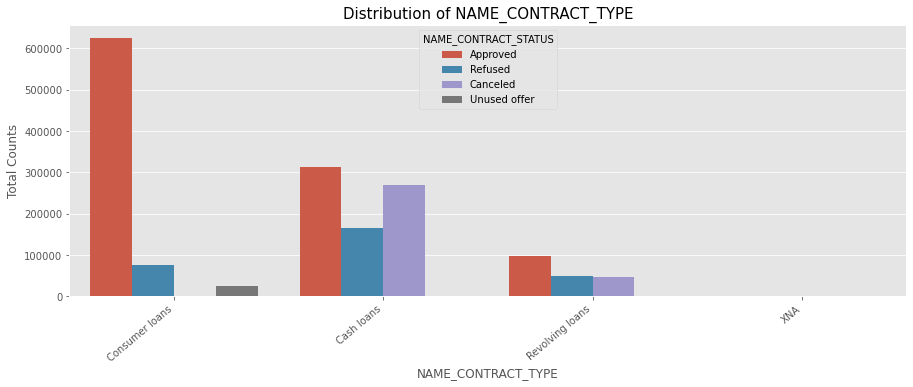

In [86]:
plot_uni('NAME_CONTRACT_TYPE')

From the above chart, we can infer that, most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused more often than others.

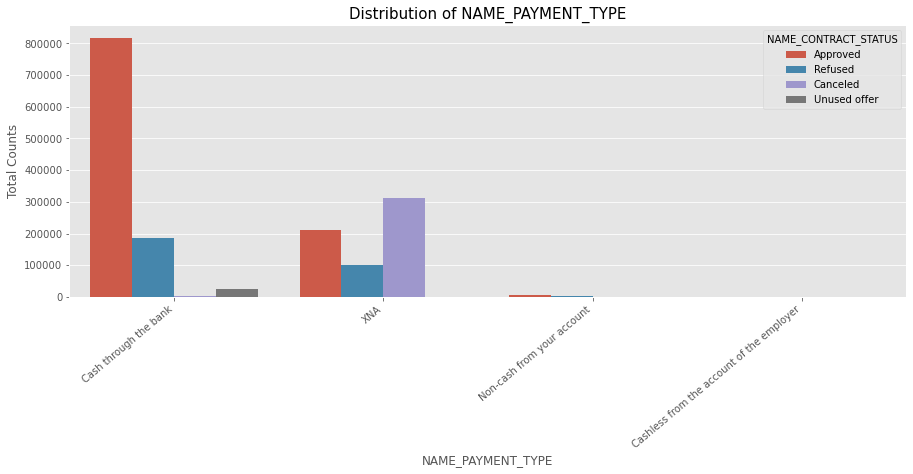

In [87]:
plot_uni('NAME_PAYMENT_TYPE')

From the above chart, we can infer that most of the clients chose to repay the loan using the 'Cash through the bank' option
We can also see that 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not at all popular in terms of loan repayment amongst the customers.

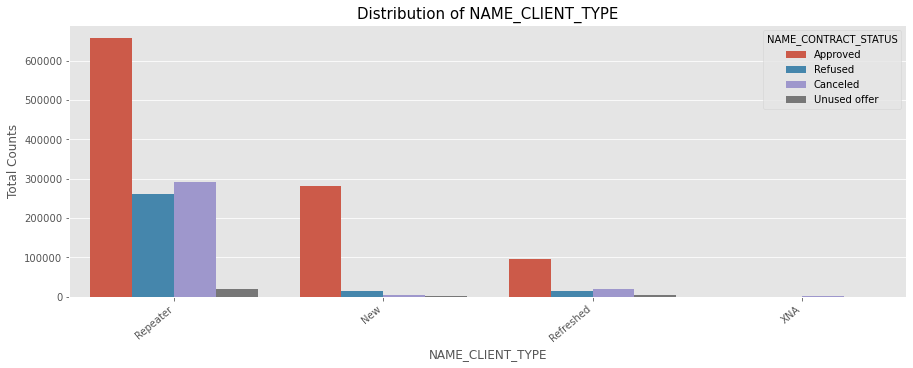

In [88]:
plot_uni('NAME_CLIENT_TYPE')

Most of the loan applications are from repeat customers, out of the total applications 70% of customers are repeaters. They also get refused most often.

Checking the correlation in the PreviousApplication dataset

In [89]:
#Getting the top 10 correlation PreviousApplication
corr=P_APP.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

C:\Users\aks2c\AppData\Local\Temp/ipykernel_12380/1133366962.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()


Column1             Column2  Correlation  \
88             AMT_GOODS_PRICE     AMT_APPLICATION     0.999884   
89             AMT_GOODS_PRICE          AMT_CREDIT     0.993087   
71                  AMT_CREDIT     AMT_APPLICATION     0.975824   
269           DAYS_TERMINATION       DAYS_LAST_DUE     0.927990   
87             AMT_GOODS_PRICE         AMT_ANNUITY     0.820895   
70                  AMT_CREDIT         AMT_ANNUITY     0.816429   
53             AMT_APPLICATION         AMT_ANNUITY     0.808872   
232  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING    -0.803494   
173                CNT_PAYMENT     AMT_APPLICATION     0.680630   
174                CNT_PAYMENT          AMT_CREDIT     0.674278   

     Abs_Correlation  
88          0.999884  
89          0.993087  
71          0.975824  
269         0.927990  
87          0.820895  
70          0.816429  
53          0.808872  
232         0.803494  
173         0.680630  
174         0.674278

Using pairplot to perform bivariate analysis on numerical columns


C:\Users\aks2c\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

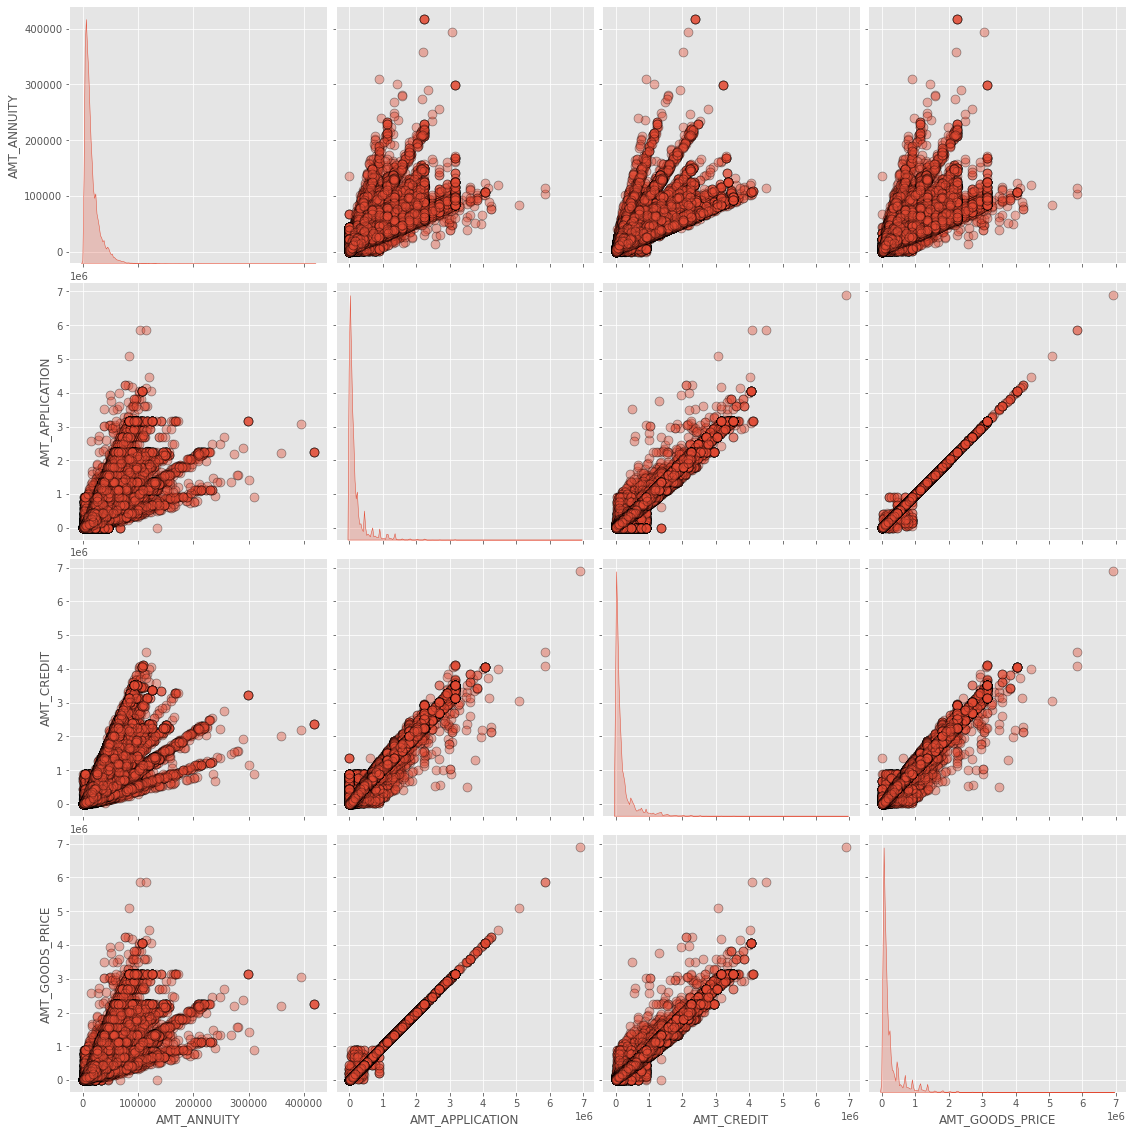

In [96]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(P_APP[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

Annuity of previous application has a very high and positive influence over:
(Increase of annuity increases below factors)

(1) How much credit did client asked on the previous application

(2)Final credit amount on the previous application that was approved by the bank

(3) Goods price of good that client asked for on the previous application.


For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application

Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.

In [93]:
#by variant analysis function
def plot_by_cat_num(cat, num):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=P_APP)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

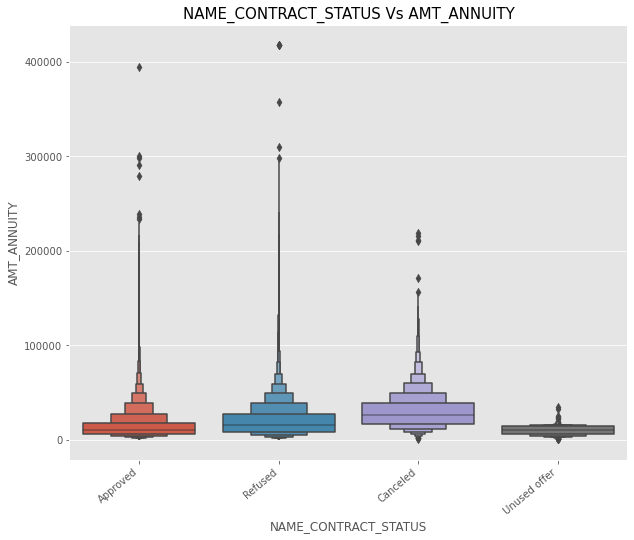

In [95]:
#by-varient analysis of Contract status and Annuity of previous appliction
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

From the above plot we can see that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time.
We also see that applications with too high AMT ANNUITY also got refused more often than others.

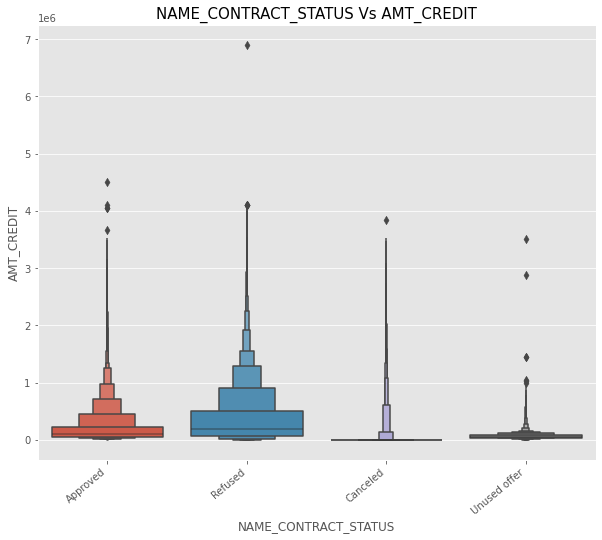

In [97]:
#by-varient analysis of Contract status and Final credit amount disbursed to the customer previously, after approval
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

# Merging the files and analyzing the data

In [98]:
## Merging the two files to do some analysis
NEW = pd.merge(N_APP_1, P_APP, how='left', on=['SK_ID_CURR'])

In [99]:
NEW.shape

(1430100, 62)

In [100]:
NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 62 columns):
 #   Column                          Non-Null Count    Dtype   
---  ------                          --------------    -----   
 0   SK_ID_CURR                      1430100 non-null  int64   
 1   TARGET                          1430100 non-null  int64   
 2   CODE_GENDER                     1430100 non-null  object  
 3   FLAG_OWN_CAR                    1430100 non-null  object  
 4   FLAG_OWN_REALTY                 1430100 non-null  object  
 5   INCOME_GROUP                    1430100 non-null  category
 6   AGE_GROUP                       1430096 non-null  category
 7   AMT_CREDIT_x                    1430100 non-null  float64 
 8   AMT_INCOME_TOTAL                1430100 non-null  float64 
 9   CREDIT_INCOME_RATIO             1430100 non-null  float64 
 10  NAME_INCOME_TYPE                1430100 non-null  object  
 11  NAME_EDUCATION_TYPE             1430100 non-null  

In [101]:
def plotuni_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('ggplot')
    sns.despine
    NewDat = NEW.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

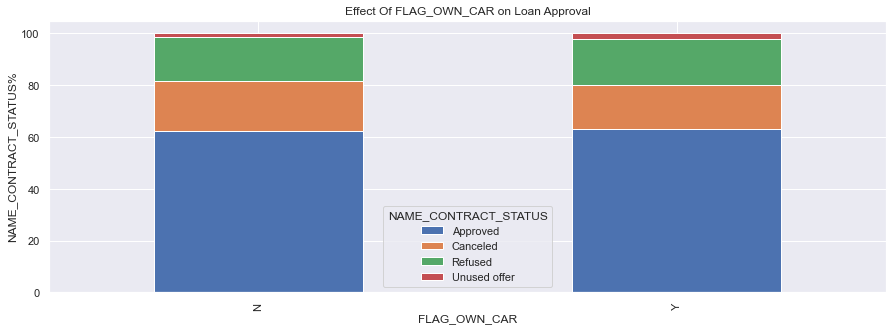

In [102]:
plotuni_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

We see that car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount

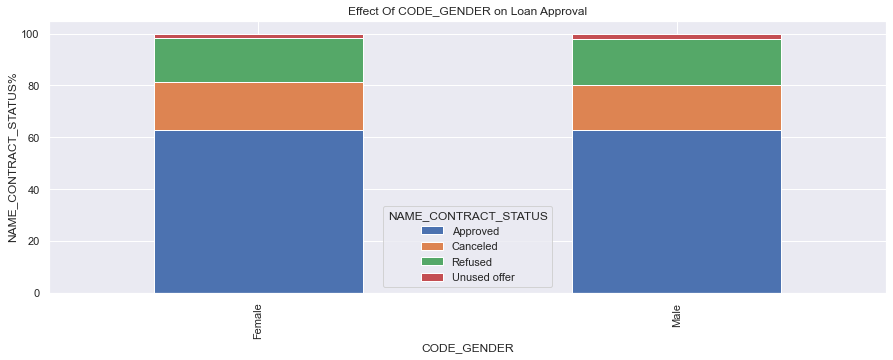

In [103]:
plotuni_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

We see that code gender doesn't have any effect on application approval or rejection.
But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.

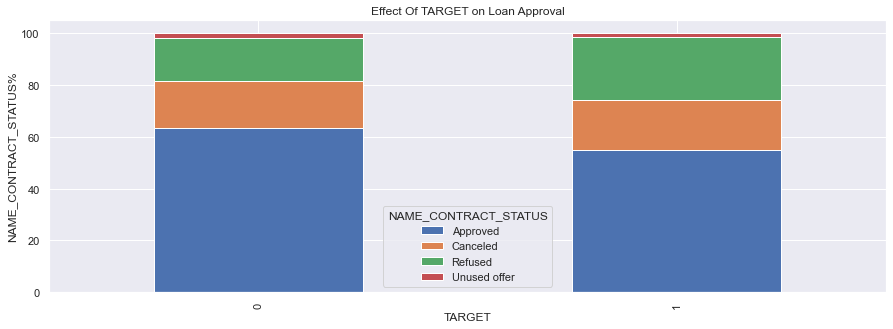

In [104]:
plotuni_combined('TARGET','NAME_CONTRACT_STATUS')

We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting.